In [10]:
import numpy as np
import matplotlib.pyplot as plt

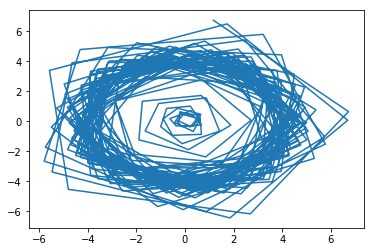

In [109]:
# Hamiltonian dynaimcs with noised gradient
m = 1
C = 3
dt = 0.1
nstep = 300
niter  = 50
# noise in the gradient
sigma = 0.5

gradUPerfect = lambda x: x
gradU = lambda x: x + np.random.randn(1) * sigma

xstart = np.ones((1, 1))
pstart = np.zeros((1, 1))

x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt/2
        x = x + p/m * dt
        p = p - gradU(x) * dt/2
    xs[i] = x
    ys[i] = p
    
xs1, ys1 = xs, ys

plt.plot(xs, ys)

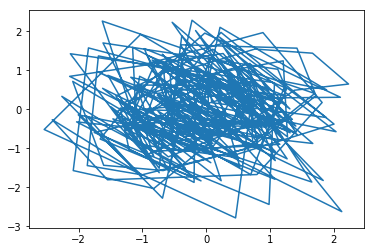

In [111]:
# Hamiltonian dynaimcs with noised gradient
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    p = np.random.randn(len(x)) * np.sqrt(m)
    for j in range(niter):
        p = p - gradU(x) * dt/2
        x = x + p/m * dt
        p = p - gradU(x) * dt/2
    xs[i] = x
    ys[i] = p
    
xs2, ys2 = xs, ys

plt.plot(xs, ys)

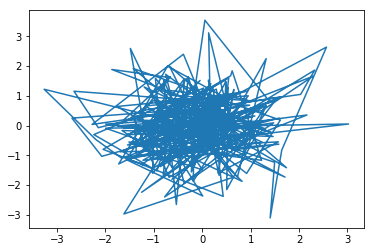

In [113]:
# Second order Langevin dynamics with noised gradient
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
Bhat = 0.5 * np.power(sigma, 2) * dt
D = np.sqrt(2 * (C - Bhat) * dt)
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p/m * dt
    xs[i] = x
    ys[i] = p
    
xs3, ys3 = xs, ys

plt.plot(xs, ys)

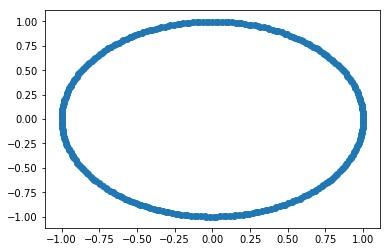

In [115]:
x = xstart
p = pstart
xs = np.zeros((nstep, 1))
ys = np.zeros((nstep, 1))
for i in range(nstep):
    for j in range(nstep):
        p = p - gradUPerfect(x) * dt / 2
        x = x + p/m * dt
        p = p -gradUPerfect(x) * dt / 2
    xs[i] = x
    ys[i] = p
    
xs4, ys4 = xs, ys

plt.scatter(xs, ys)

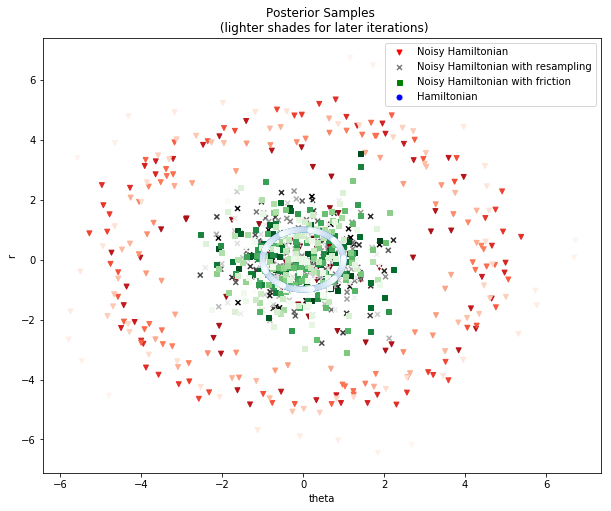

In [154]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xs1, ys1,c=list(reversed(range(0,nstep))),s=25,
           cmap='Reds',marker='v',
           label='Noisy Hamiltonian')
ax.scatter(xs2, ys2,c=list(reversed(range(0,nstep))),s=25,
           cmap='Greys',marker='x',
           label='Noisy Hamiltonian with resampling')
ax.scatter(xs2, ys3,c=list(reversed(range(0,nstep))),s=25,
           cmap='Greens',marker='s',
           label='Noisy Hamiltonian with friction')
ax.scatter(xs4, ys4,c=list(reversed(range(0,nstep))),s=25,
           cmap='Blues',marker='o',
           label='Hamiltonian')

ax.set_title("Posterior Samples \n (lighter shades for later iterations)")
ax.set_ylabel("r")
ax.set_xlabel("theta")

leg = ax.legend(loc='upper right')
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
leg.legendHandles[2].set_color('green')
leg.legendHandles[3].set_color('blue')

fig.savefig('fig2.png')